In [2]:
import numpy as np
import matplotlib.pyplot as plt

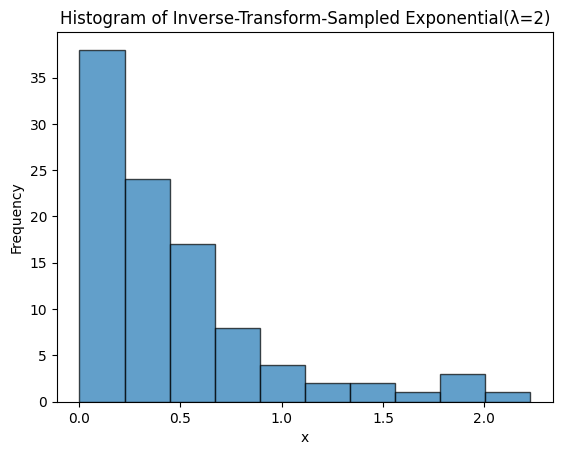

In [1]:
# Set the random seed for reproducibility (optional)
np.random.seed(0)

# Number of samples
n = 100
lambda_param = 2.0

# Step 1: Generate n uniform(0, 1) random variables
u = np.random.rand(n)

# Step 2: Apply the inverse CDF (inverse transform)
# For Exp(lambda): F^{-1}(u) = - (1/lambda) * ln(1 - u)
# Note: Since 1-u is also uniform(0,1), one can equivalently use - (1/lambda)*ln(u).
x = -(1/lambda_param) * np.log(1 - u)

# Step 3: Plot the histogram of the samples
plt.hist(x, bins=10, edgecolor='black', alpha=0.7)
plt.title('Histogram of Inverse-Transform-Sampled Exponential(\u03BB=2)')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.show()


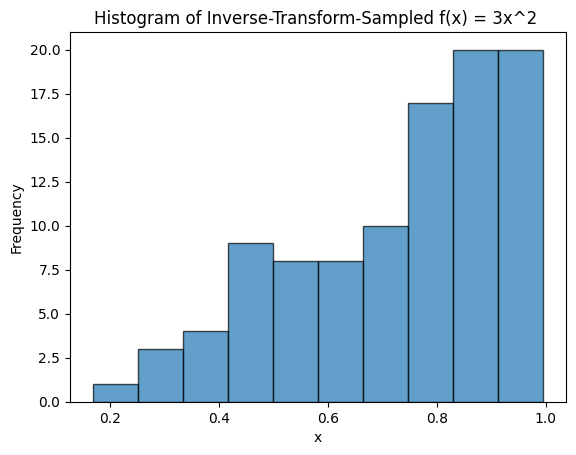

In [6]:


# Set the random seed for reproducibility (optional)
np.random.seed(0)

# Number of samples
n = 100
lambda_param = 2.0

# Step 1: Generate n uniform(0, 1) random variables
u = np.random.rand(n)

# Step 2: Apply the inverse CDF (inverse transform)
x = (u**(1/3))

# Step 3: Plot the histogram of the samples
plt.hist(x, bins=10, edgecolor='black', alpha=0.7)
plt.title('Histogram of Inverse-Transform-Sampled f(x) = 3x^2 ')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.show()

Value | Theoretical  |  Empirical
-----------------------------------
   -2 |       0.10  |     0.120
   -1 |       0.15  |     0.160
    0 |       0.25  |     0.230
    1 |       0.30  |     0.340
    2 |       0.20  |     0.150


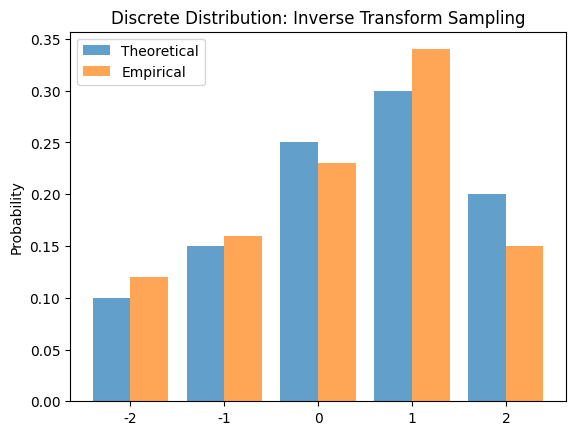

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the possible values of X and their probabilities
vals = np.array([-2, -1,  0,  1,  2])
p    = np.array([0.1, 0.15, 0.25, 0.3, 0.2])

# Just to be sure everything sums to 1
assert np.isclose(p.sum(), 1.0), "Probabilities must sum to 1!"

# 2. Compute the CDF
cdf = np.cumsum(p)
# cdf is now [0.1, 0.25, 0.5, 0.8, 1.0]

def sample_discrete(vals, cdf, n=1):
    """
    Generate n samples from the discrete distribution defined by
    vals (the distinct values) and cdf (the cumulative distribution).
    """
    # Draw n independent Uniform(0,1) samples
    u = np.random.rand(n)
    
    # For each uniform sample, find the smallest index where cdf[index] >= u
    # np.searchsorted does exactly this:
    indices = np.searchsorted(cdf, u)
    
    # Map each index back to the corresponding value
    return vals[indices]

# 3. Generate samples
np.random.seed(0)      # for reproducibility
n_samples = 100
samples   = sample_discrete(vals, cdf, n_samples)

# 4. Check empirical frequencies
unique, counts = np.unique(samples, return_counts=True)
empirical_p    = counts / n_samples

print("Value | Theoretical  |  Empirical")
print("-----------------------------------")
for v, p_theo, p_emp in zip(vals, p, empirical_p):
    print(f"{v:5d} | {p_theo:10.2f}  |  {p_emp:8.3f}")

# 5. Visualize
fig, ax = plt.subplots()
# We'll create a bar chart comparing empirical and theoretical probabilities
bar_width = 0.4

# x positions for each bar (use the integer indices, then shift for side-by-side bars)
indices_vals = np.arange(len(vals))

ax.bar(indices_vals - bar_width/2, p, width=bar_width, alpha=0.7, label='Theoretical')
ax.bar(indices_vals + bar_width/2, empirical_p, width=bar_width, alpha=0.7, label='Empirical')

ax.set_xticks(indices_vals)
ax.set_xticklabels(vals)
ax.set_ylabel("Probability")
ax.set_title("Discrete Distribution: Inverse Transform Sampling")
ax.legend()
plt.show()


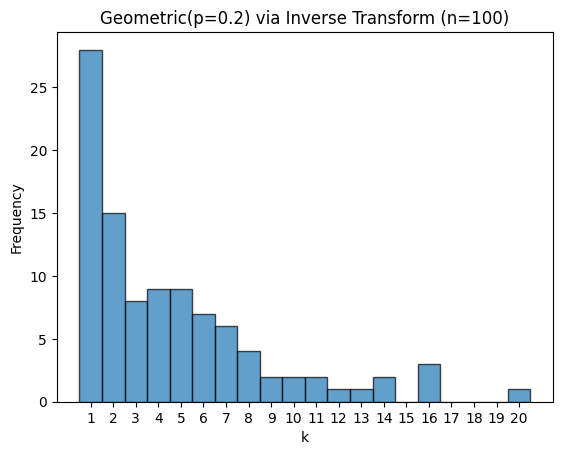

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Fix the random seed for reproducibility (optional)
np.random.seed(42)

# Parameter of the Geometric distribution
p = 0.2

# Number of samples
n = 100

# Step 1: Generate n Uniform(0,1) random variables
u = np.random.rand(n)

# Step 2: Apply the inverse CDF (inverse transform)
# Geometric(p) on {1,2,3,...}:
#   F(k) = 1 - (1-p)^k
#   X = ceil( log(1-U) / log(1-p) ), ensuring X >= 1
numerator   = np.log(1 - u)
denominator = np.log(1 - p)
raw_samples = numerator / denominator  # might be non-integer

# Because we want the smallest integer k >= that fraction, use np.ceil
x = np.ceil(raw_samples)

# Ensure that X >= 1
x = np.clip(x, 1, None)  # clips values below 1 up to 1

# Convert to integer type
x = x.astype(int)

# Step 3: Plot the histogram of the samples
# For a discrete distribution, it often looks nicer to center bars at integers:
plt.hist(x, bins=range(1, max(x)+2), edgecolor='black', align='left', alpha=0.7)
plt.title('Geometric(p=0.2) via Inverse Transform (n=100)')
plt.xlabel('k')
plt.ylabel('Frequency')
plt.xticks(range(1, max(x)+1))
plt.show()


### Python learnings
- np.searchsorted(cdf, u)
- np.cumsum(p)
it is a CDF like function
something like
new_ls = []
total = 0
for x in ls:

- np.isclose(p.sum(), 1.0), 

###
- Geomtric distrobution
    - Mean
    - Type
    - The inverse of Geomtetric
    - Inverse of Exponential
    


In [2]:
import numpy as np
cdf = np.array([0.2, 0.5, 0.8, 1.0])  # Suppose these are cumulative probabilities
u = np.array([0.1, 0.45, 0.75, 0.99]) # 4 uniform samples
indices = np.searchsorted(cdf, u)
print(indices) 

[0 1 2 3]
